# PROJECT

# Car Price Prediction Using Machine Learning

In [ ]:
2. Dataset Explanation

The dataset used in this project taken from kaggle, contains detailed information about vehicles listed for sale, with each row representing a single vehicle.
The dataset includes both numerical and categorical features. The Price column is the target variable we aim to predict. Features such as Mileage, 
Engine volume, Production year, and Airbags provide measurable numerical attributes of each vehicle. Categorical variables like Manufacturer, Model,
Fuel type, Gear box type, Drive wheels, Leather interior, Color, Category, and Wheel position describe qualitative characteristics that influence price.
The ID column uniquely identifies each record and is not useful for prediction, so it will be removed during preprocessing. This dataset provides a rich 
combination of vehicle specifications that can be used to train an effective regression model for price prediction.

# Import Necessary Libraries

In [48]:
# Basic
import pandas as pd
import numpy as np
import re
# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
# Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
# Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

# Load the Dataset

In [49]:
df=pd.read_csv(r'C:\Users\HP\Desktop\data analytics\data set\car_price_prediction.csv')

# Understanding of Data

In [50]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [51]:
df.tail()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4
19236,45813273,470,753,HYUNDAI,Sonata,2012,Sedan,Yes,Hybrid,2.4,186923 km,4.0,Automatic,Front,04-May,Left wheel,White,12


In [52]:
df.dtypes

ID                    int64
Price                 int64
Levy                 object
Manufacturer         object
Model                object
Prod. year            int64
Category             object
Leather interior     object
Fuel type            object
Engine volume        object
Mileage              object
Cylinders           float64
Gear box type        object
Drive wheels         object
Doors                object
Wheel                object
Color                object
Airbags               int64
dtype: object

In [53]:
# Check how many rows and columns the dataset has
df.shape

(19237, 18)

In [54]:
# Display the names of all columns/features
df.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

In [55]:
# Check data types, non-null counts, and memory usage of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [56]:
# Check how many duplicate rows are present in the dataset
df.duplicated().sum()

np.int64(313)

In [57]:
# Get statistical summary of numerical columns (mean, min, max, etc.)
df.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [58]:
df.describe(include="object")

,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Doors,Wheel,Color
count,19237,19237,19237,19237,19237,19237,19237,19237,19237,19237,19237,19237,19237
unique,559,65,1590,11,2,7,107,7687,4,3,3,2,16
top,-,HYUNDAI,Prius,Sedan,Yes,Petrol,2,0 km,Automatic,Front,04-May,Left wheel,Black
freq,5819,3769,1083,8736,13954,10150,3916,721,13514,12874,18332,17753,5033


In [59]:
# find missing value
df.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [60]:
df.nunique()

ID                  18924
Price                2315
Levy                  559
Manufacturer           65
Model                1590
Prod. year             54
Category               11
Leather interior        2
Fuel type               7
Engine volume         107
Mileage              7687
Cylinders              13
Gear box type           4
Drive wheels            3
Doors                   3
Wheel                   2
Color                  16
Airbags                17
dtype: int64

In [61]:
for col in df.select_dtypes(include='object').columns:
    print(f"Value counts for: {col}")
    print(df[col].value_counts())
    print("***" * 10)

Value counts for: Levy
Levy
-       5819
765      486
891      461
639      410
640      405
        ... 
676        1
1678       1
1369       1
328        1
955        1
Name: count, Length: 559, dtype: int64
******************************
Value counts for: Manufacturer
Manufacturer
HYUNDAI          3769
TOYOTA           3662
MERCEDES-BENZ    2076
FORD             1111
CHEVROLET        1069
                 ... 
LAMBORGHINI         1
PONTIAC             1
SATURN              1
ASTON MARTIN        1
GREATWALL           1
Name: count, Length: 65, dtype: int64
******************************
Value counts for: Model
Model
Prius               1083
Sonata              1079
Camry                938
Elantra              922
E 350                542
                    ... 
Tiguan SE              1
A6 evropuli            1
500 SPORT              1
Prius C YARIS IA       1
CL550 AMG              1
Name: count, Length: 1590, dtype: int64
******************************
Value counts for: Category
C

# Data Cleaning Data Preprocessing

In [62]:
df['Levy'] = df['Levy'].replace('-', np.nan)
df['Levy'] = df['Levy'].astype(float)

In [63]:
counts = df['Manufacturer'].value_counts()
rare = counts[counts < 10].index

df['Manufacturer'] = df['Manufacturer'].replace(rare, 'Rare_Manufacturer')

In [64]:
df['Engine volume'] = df['Engine volume'].str.replace(' Turbo', '', regex=False)
df['Engine volume'] = df['Engine volume'].astype(float)

In [65]:
df['Mileage'] = df['Mileage'].str.replace(' km', '', regex=False)
df['Mileage'] = df['Mileage'].astype(int)

In [66]:
df['Doors'] = df['Doors'].replace({
    '04-May': '4-5',
    '02-Mar': '2-3',
})

In [67]:
df['Fuel type'] = df['Fuel type'].replace({
    'plug-in hybrid': 'plugin hybrid',
    'plug in hybrid': 'plugin hybrid'
})

In [68]:
df['Drive wheels'] = df['Drive wheels'].replace({
    '4wd': '4x4',
    'awd': '4x4'
})

In [69]:
a=LabelEncoder()
df['Manufacturer']=a.fit_transform(df['Manufacturer'])
df['Model']=a.fit_transform(df['Model'])
df['Category']=a.fit_transform(df['Category'])
df['Leather interior']=a.fit_transform(df['Leather interior'])
df['Fuel type']=a.fit_transform(df['Fuel type'])
df['Gear box type']=a.fit_transform(df['Gear box type'])
df['Drive wheels']=a.fit_transform(df['Drive wheels'])
df['Doors']=a.fit_transform(df['Doors'])
df['Wheel']=a.fit_transform(df['Wheel'])
df['Color']=a.fit_transform(df['Color'])

In [70]:
df.isnull().sum()

ID                     0
Price                  0
Levy                5819
Manufacturer           0
Model                  0
Prod. year             0
Category               0
Leather interior       0
Fuel type              0
Engine volume          0
Mileage                0
Cylinders              0
Gear box type          0
Drive wheels           0
Doors                  0
Wheel                  0
Color                  0
Airbags                0
dtype: int64

In [71]:
df['Levy']=df['Levy'].fillna(df['Levy'].mode()[0])

In [72]:
for col in df.select_dtypes(include='object').columns:
    freq = df[col].value_counts(normalize=True)
    rare = freq[freq < 0.01].index
    df[col] = df[col].replace(rare, 'other')

In [73]:
df = df.drop_duplicates()

# Outlier Detection & Treatment

In [83]:
q1 = df['Price'].quantile(0.25)
q3 = df['Price'].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
df = df[(df['Price'] >= lower) & (df['Price'] <= upper)]



q1 = df['Mileage'].quantile(0.25)
q3 = df['Mileage'].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
df = df[(df['Mileage'] >= lower) & (df['Mileage'] <= upper)]

In [90]:
# use after EDA
x = df.drop('Price', axis=1)
y = df['Price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [94]:
# 1. Scale first
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

# 2. Feature selection AFTER scaling
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(f_regression, k=10)
selector.fit(X_train_scaled, y_train)

X_train_sel = selector.transform(X_train_scaled)
X_test_sel = selector.transform(X_test_scaled)


# Exploratory Data Analysis (EDA)

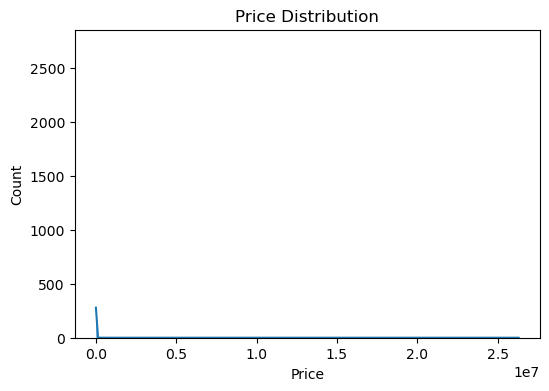

In [77]:
# Distribution of the target variable
plt.figure(figsize=(6,4))
sns.histplot(df['Price'], kde=True)
plt.title("Price Distribution")
plt.show()

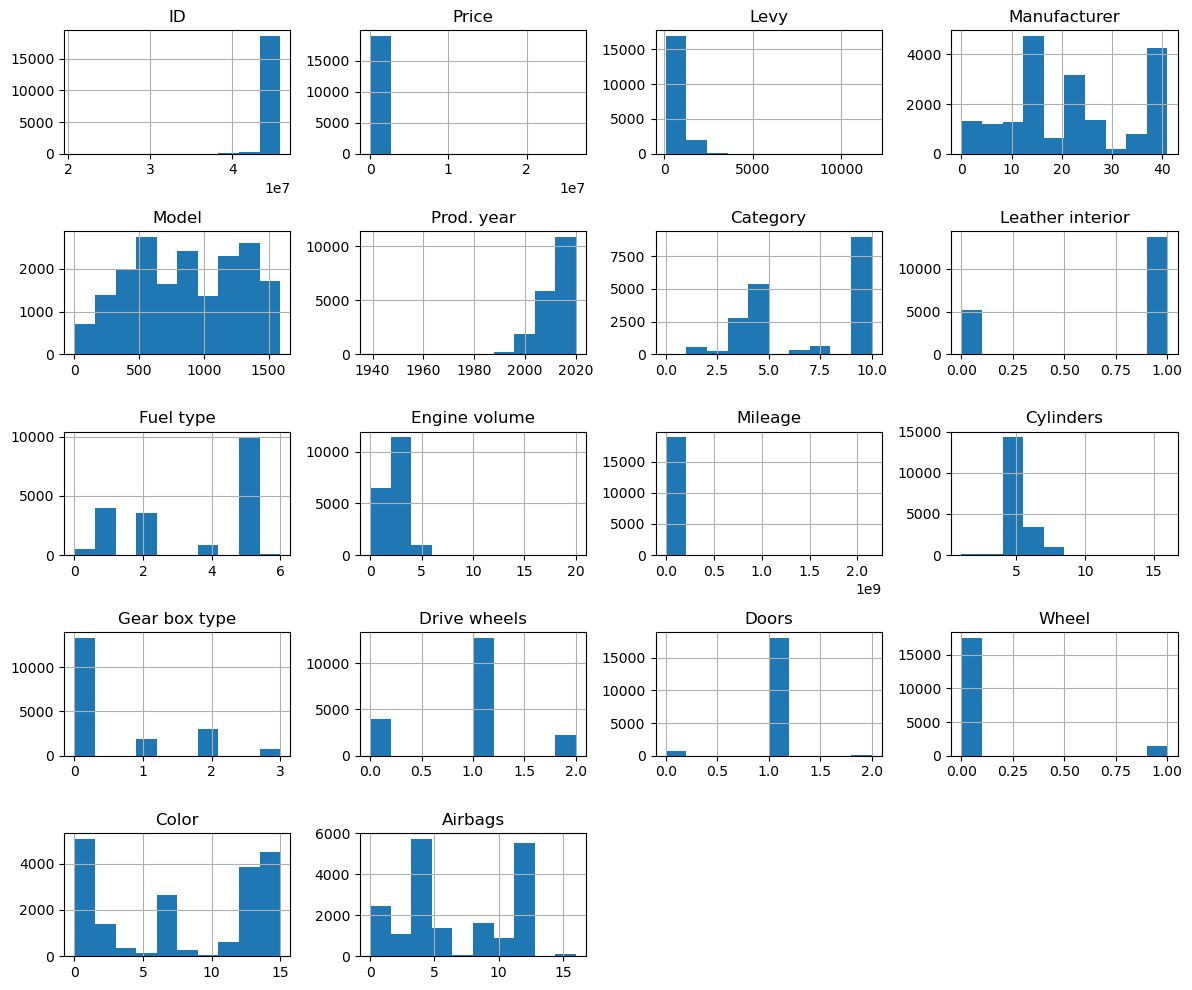

In [78]:
# Plot histograms for all numerical columns
df.select_dtypes(include='number').hist(figsize=(12,10))
plt.tight_layout()
plt.show()

In [79]:
# correlation with heatmap to interpret the relation and multicolliniarity
correlation = df.corr(numeric_only=True)
correlation

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
ID,1.000000,-0.000797,0.016028,-0.035076,-0.003355,0.072030,0.043807,0.098480,-0.015685,-0.013155,0.004225,-0.040617,-0.086910,-0.012649,0.019373,-0.086876,-0.000015,-0.022070
Price,-0.000797,1.000000,0.003784,-0.002756,0.000662,0.012689,-0.019848,0.000551,-0.012476,0.008888,-0.001763,0.007435,0.016060,-0.003306,-0.031198,-0.014558,-0.010451,-0.012709
Levy,0.016028,0.003784,1.000000,0.002960,0.004857,-0.007852,-0.037812,0.084080,0.057424,0.533139,0.002189,0.439576,-0.064104,-0.137836,-0.012637,0.064741,-0.041686,0.084723
Manufacturer,-0.035076,-0.002756,0.002960,1.000000,-0.016985,-0.061912,-0.038690,-0.182507,-0.084170,-0.037883,0.012670,-0.087776,0.056857,-0.063267,0.041571,0.088527,0.029757,0.177296
Model,-0.003355,0.000662,0.004857,-0.016985,1.000000,0.064736,-0.165242,-0.002072,-0.168451,0.027045,-0.008184,-0.007303,-0.056149,-0.185820,0.071607,-0.033839,0.072150,-0.105103
Prod. year,0.072030,0.012689,-0.007852,-0.061912,0.064736,1.000000,0.070824,0.388608,0.055149,-0.032427,-0.064058,-0.099443,-0.218997,-0.125089,0.176678,-0.228141,0.011403,0.235160
Category,0.043807,-0.019848,-0.037812,-0.038690,-0.165242,0.070824,1.000000,0.092195,0.112179,0.003950,0.008173,-0.064761,-0.009413,0.212334,0.221986,-0.119409,-0.019457,0.134615
Leather interior,0.098480,0.000551,0.084080,-0.182507,-0.002072,0.388608,0.092195,1.000000,-0.033814,0.271749,-0.034682,0.199716,-0.288333,-0.087991,0.094042,-0.346620,-0.056343,0.161889
Fuel type,-0.015685,-0.012476,0.057424,-0.084170,-0.168451,0.055149,0.112179,-0.033814,1.000000,0.022789,-0.015351,0.078438,0.103579,-0.041325,-0.044347,0.081820,-0.077465,0.078033
Engine volume,-0.013155,0.008888,0.533139,-0.037883,0.027045,-0.032427,0.003950,0.271749,0.022789,1.000000,-0.006292,0.777228,-0.008490,-0.222393,-0.014146,-0.185995,-0.121863,0.221991


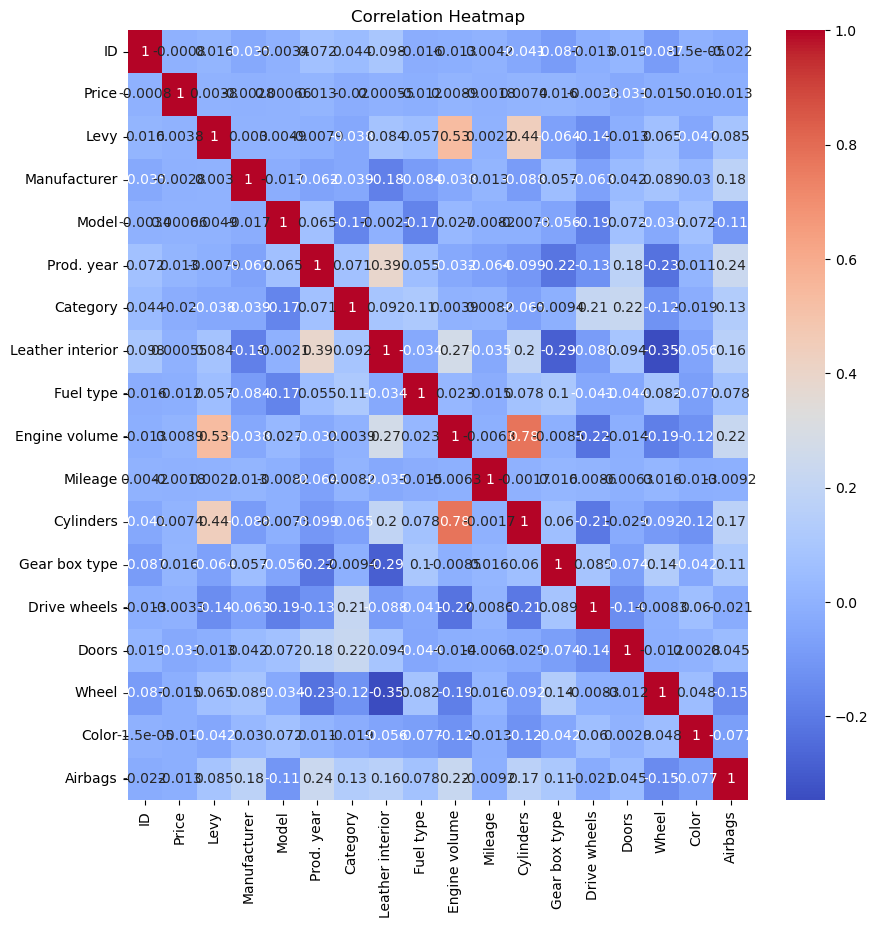

In [80]:
# Correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(correlation,annot=True,cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

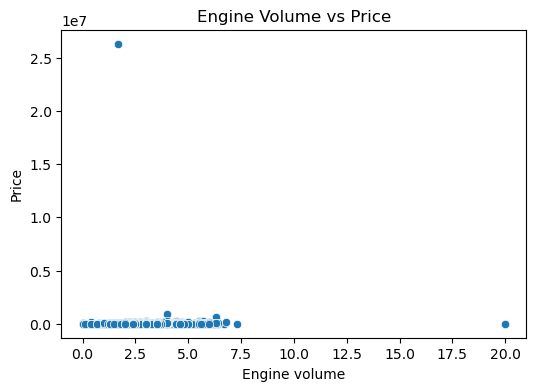

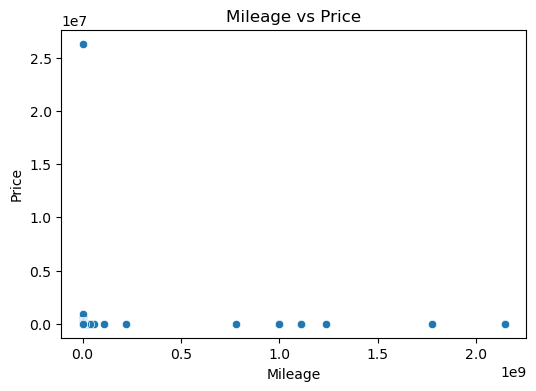

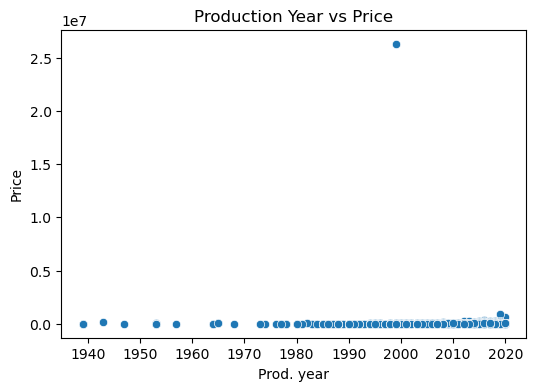

In [81]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='Engine volume', y='Price', data=df)
plt.title("Engine Volume vs Price")
plt.show()

# ScatterPlot: Mileage vs Price
plt.figure(figsize=(6,4))
sns.scatterplot(x='Mileage', y='Price', data=df)
plt.title("Mileage vs Price")
plt.show()

# ScatterPlot: Production Year vs Price
plt.figure(figsize=(6,4))
sns.scatterplot(x='Prod. year', y='Price', data=df)
plt.title("Production Year vs Price")
plt.show()

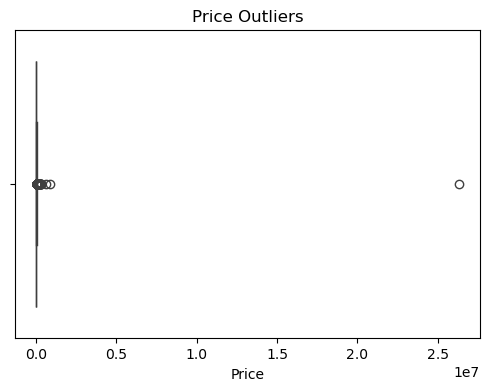

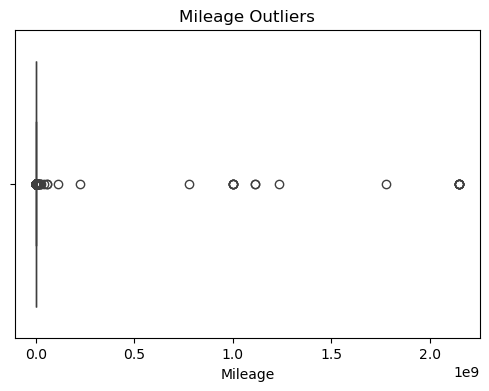

In [82]:
# Boxplots to Detect Outliers
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Price'])
plt.title("Price Outliers")
plt.show()
# Mileage Outliers
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Mileage'])
plt.title("Mileage Outliers")
plt.show()

In [84]:
df['Price'].head()
df['Price'].dtype

dtype('int64')

In [85]:
# Categorical Feature Analysis
# Average price per manufacturer
df.groupby('Manufacturer')['Price'].mean().sort_values(ascending=False).head(10)

Manufacturer
34    29720.377404
20    21115.130435
18    20086.317073
15    19785.172403
16    18528.000000
25    16750.543478
30    16098.935484
33    16075.833333
2     15590.358974
17    15425.375000
Name: Price, dtype: float64

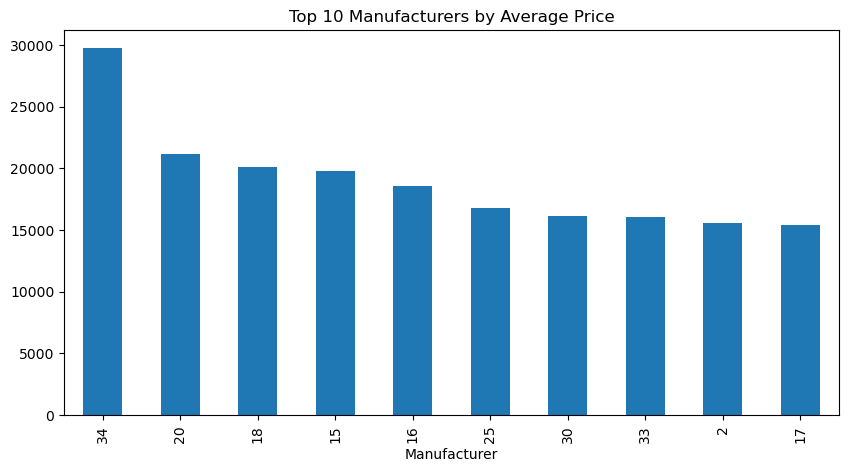

In [86]:
# Plot: Top 10 Manufacturers by Average Price
plt.figure(figsize=(10,5))
df.groupby('Manufacturer')['Price'].mean().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Top 10 Manufacturers by Average Price")
plt.show()

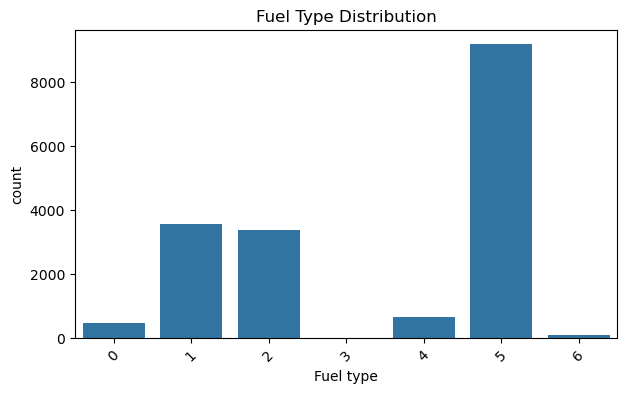

In [87]:
# Count Plots for Important Categorical Columns
plt.figure(figsize=(7,4))
sns.countplot(x='Fuel type', data=df)
plt.title("Fuel Type Distribution")
plt.xticks(rotation=45)
plt.show()

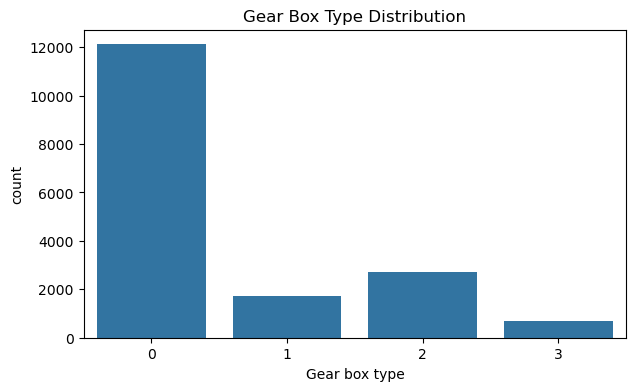

In [88]:
plt.figure(figsize=(7,4))
sns.countplot(x='Gear box type', data=df)
plt.title("Gear Box Type Distribution")
plt.show()

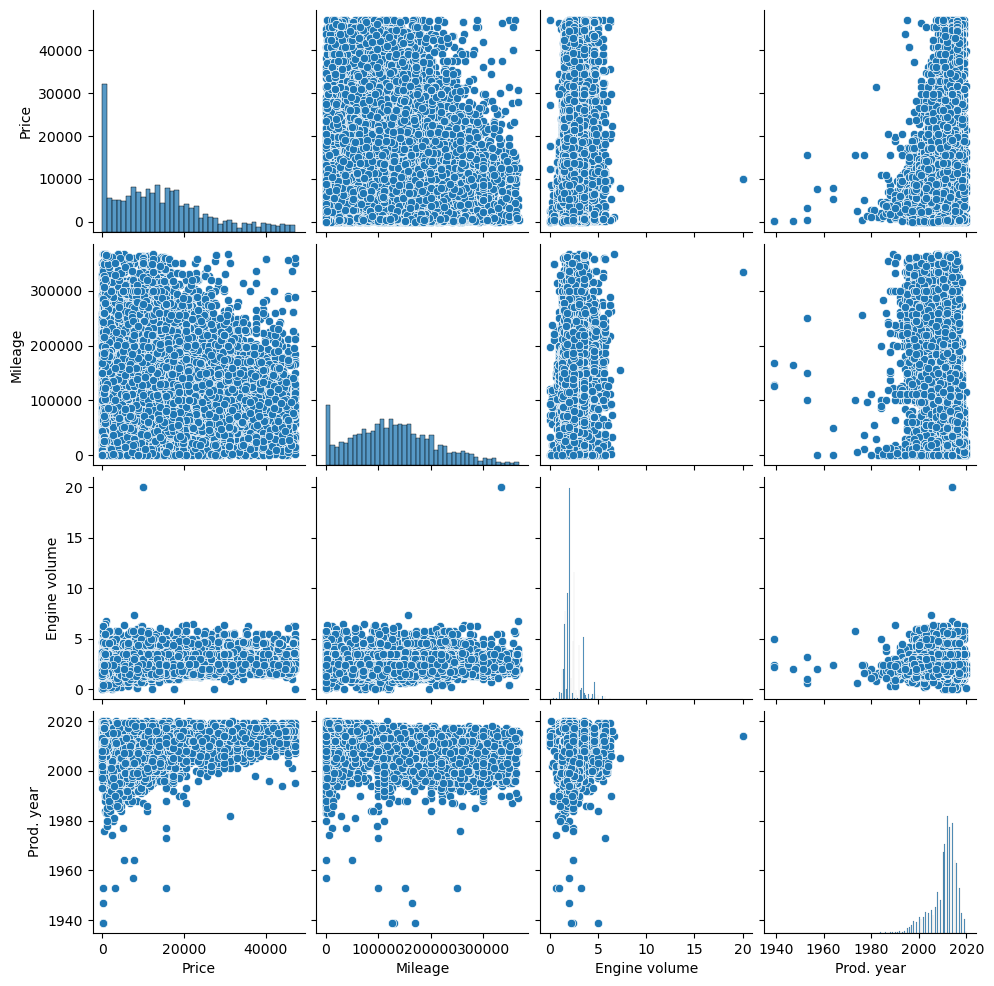

In [89]:
sns.pairplot(df[['Price', 'Mileage', 'Engine volume', 'Prod. year']])
plt.show()